In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,LogLocator,NullFormatter)

### Loading data

In [3]:

df = pd.read_csv(r"E:\Simplelearn_AI and ML\Applied data science with python\AusApparalSales4thQrt2020.csv")
df

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-20,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-20,Evening,TAS,Kids,15,37500
7557,30-Dec-20,Evening,TAS,Men,15,37500
7558,30-Dec-20,Evening,TAS,Women,11,27500


# 1. Data wrangling
## Ensure that data is clean and there is no missing data

In [4]:
df.isnull().values.any()

False

In [5]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


## Including recommendations for missing data and incorrect data

In [8]:
# df_cleaned = df.dropna()  
# or use data.fillna() based on analysis

## data normalization

In [7]:
# Normalize the data
normalized_df_sales = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
normalized_df_unit  = (df['Unit'] - df['Unit'].min()) / (df['Unit'].max() - df['Unit'].min())

## recommendation on the usage of the groupby() function for data chunking or merging.

In [8]:
grouped_data = df.groupby('State')['Sales'].sum()
grouped_data

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

## 2. Descriptive statistics

### Perform descriptive statistical analysis on the data (Sales and Unit columns) 

In [9]:
sales_stats = df[['Sales','Unit']].describe()
sales_stats

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


### Highest and lowest sales group

In [10]:
# Highest and lowest sales group and state
highest_sales_group = df.groupby('Group')['Sales'].sum().idxmax()
lowest_sales_group = df.groupby('Group')['Sales'].sum().idxmin()
highest_sales_group

' Men'

In [11]:
lowest_sales_group

' Seniors'

### Highest and lowest sales state

In [12]:
highest_sales_state = df.groupby('State')['Sales'].sum().idxmax()
lowest_sales_state = df.groupby('State')['Sales'].sum().idxmin()

In [13]:
highest_sales_state

' VIC'

In [14]:
lowest_sales_state

' WA'

## Generate weekly, monthly and quarterly reports for the analysis made

In [16]:
df.index = pd.to_datetime(df.index)

In [17]:
# Generate reports
weekly_report = df.resample('W').sum()
monthly_report = df.resample('M').sum()
quarterly_report = df.resample('Q').sum()

In [22]:
quarterly_report

,Date,Time,State,Group,Unit,Sales
1970-03-31,01-Oct-2001-Oct-2001-Oct-2001-Oct-2001-Oct-200...,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,136121,340302500


## 3. Data visualization

## State-wise sales analysis for different groups (kids, women, men, and seniors) 

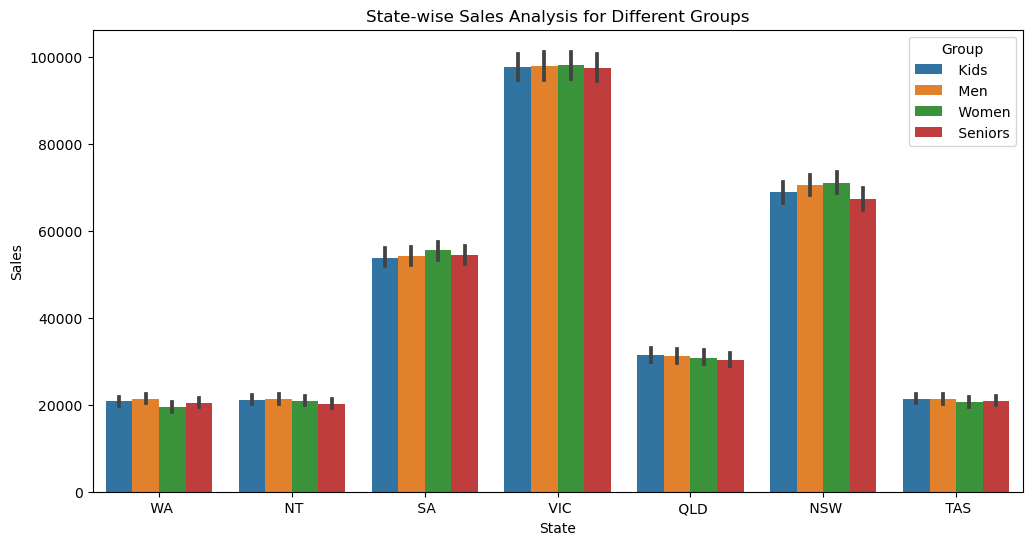

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# State-wise sales analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis for Different Groups')
plt.show()


- State victoria has the highest sales for all kids,Men,Women,Seniors

## Group-wise sales analysis (kids, women, men, and seniors) across different states.

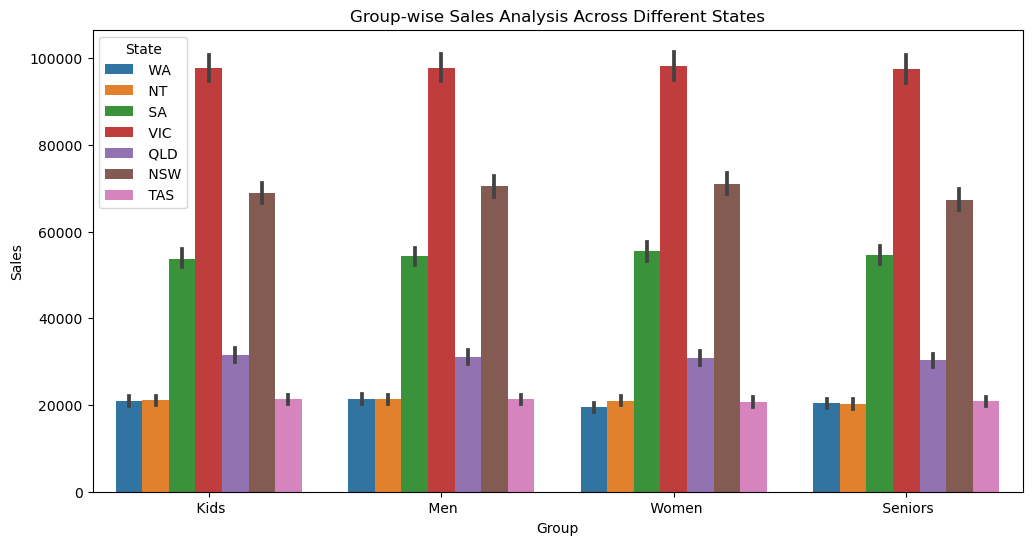

In [25]:
# Group-wise sales analysis across states
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df)
plt.title('Group-wise Sales Analysis Across Different States')
plt.show()

- Across different states all kids,women,men and seniors have approximately similar sales

## Time-of-the-day analysis

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


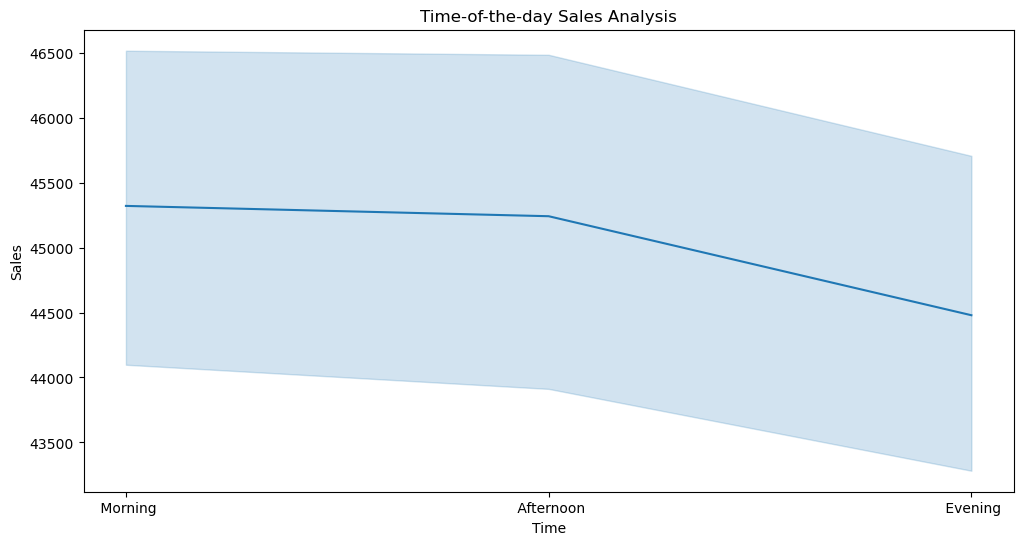

In [28]:
# Time-of-the-day analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Sales', data=df)
plt.title('Time-of-the-day Sales Analysis')
plt.show()

- In between morning to afternoon time zone the sales are maximum

## 4 Box plot for descriptive statistics

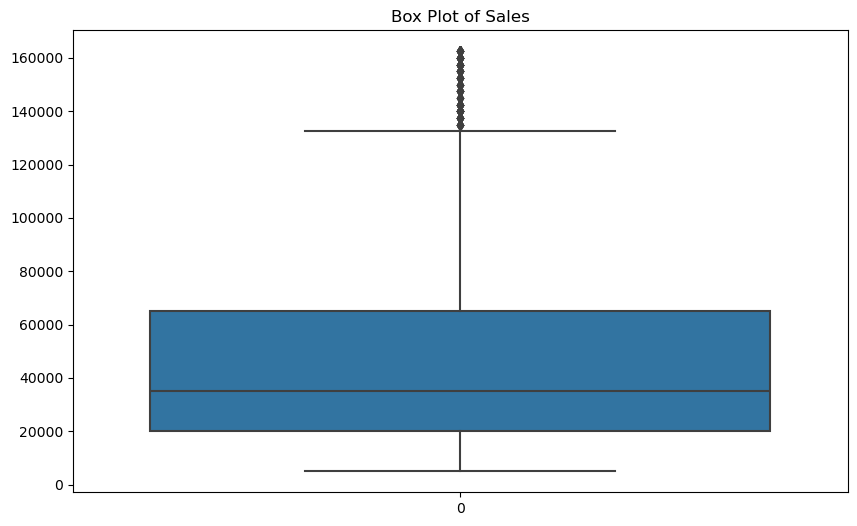

In [15]:
# Descriptive Statistics
## Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

## 4 Distribution plot for statistical plotting

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


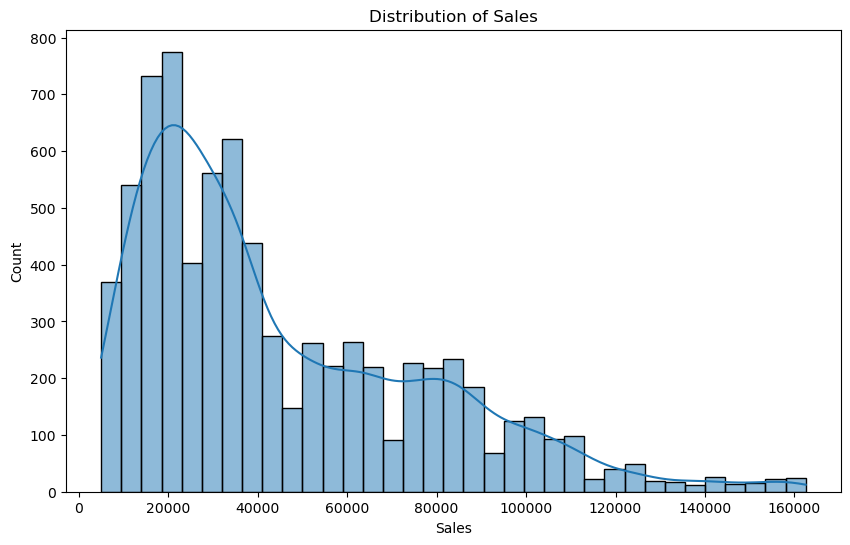

In [16]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

In [ ]:
# Markdown for analysis and recommendations
"""
## Analysis and Recommendations

### Descriptive Statistics

- The box plot of sales shows...
- The distribution plot indicates...

### State-wise Sales Analysis

- The bar plot illustrates...
- Based on the analysis, we recommend...

### Group-wise Sales Analysis

- The bar plot reveals...
- Our recommendation is...

### Time-of-the-day Analysis

- The line plot shows...